## Лабораторная №1

## Учимся распознавать ирисы

Мы используем знаменитый в области Data Science набор данных, содержащий измерения 4 параметров длины цветка для трех разных типов ирисов.

In [1]:
%matplotlib inline
from cntk.layers import *
import pylab

In [2]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Iris_flower_data_set', width=800, height=350)

Для чтения данных в формате `CSV` используем библиотеку `pandas`. Объекты, с которыми оперирует `pandas`, называются *data frames*

In [3]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Мы можем посмотреть на то, как коррелируют друг с другом те или иные признаки:

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


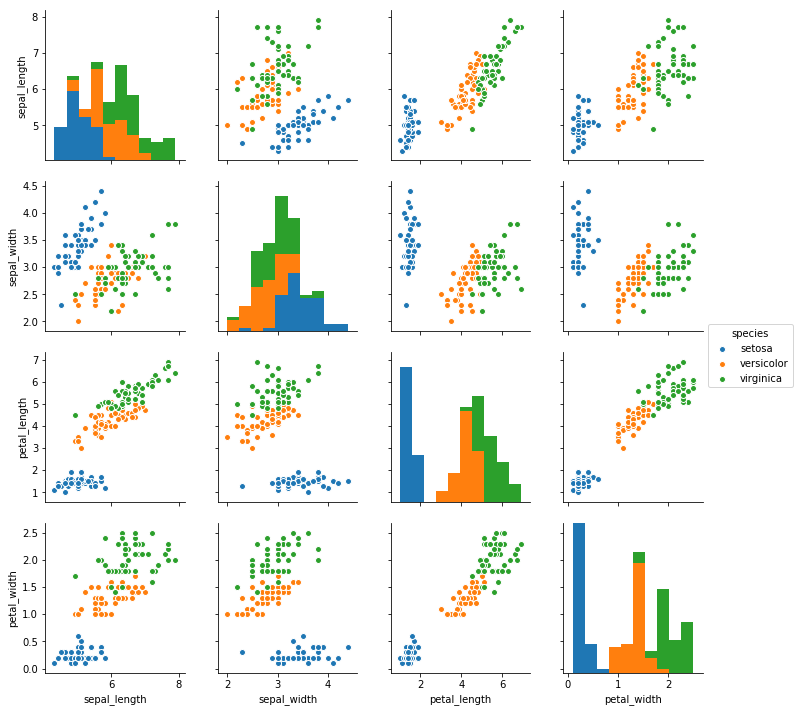

In [4]:
import seaborn.apionly as sns
pp = sns.pairplot(iris, hue="species")

## Преобразование данных

Значительную долю в работе Data Scientist-а занимает процесс предобработки данных. В нашем случае основное, что надо сделать - преобразовать *категориальный* столбец с названием ириса в числовой.

In [5]:
# Строим отображение типов ирисов на номер класса
fwmap = dict(enumerate(set(iris.values[:,4])))
bkmap = {fwmap[k] : k for k in fwmap}
print(fwmap,bkmap)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'} {'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [21]:
def conv(n):
    """
    Преобразует название класса в трехмерный вектор из нулей и единиц
    """
    return [ 1 if x==n else 0 for i,x in fwmap.items() ]

data = np.random.permutation(iris.values)

train = data[0:100]
test = data[100:]
train_x = train[:,0:4]
print("Sample of training features\n",train_x[0:4])
train_y = np.array(list(map(conv,train[:,4])),dtype=np.float32)
print("Sample of training labels\n",train_y[0:4])

test_x = test[:,0:4]
test_y = np.array(list(map(conv,test[:,4])),dtype=np.float32)

Sample of training features
 [[5.5 2.4 3.7 1.0]
 [5.8 2.7 5.1 1.9]
 [4.7 3.2 1.3 0.2]
 [5.1 3.3 1.7 0.5]]
Sample of training labels
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


## Задание

1. С использованием выбранного фреймворка (CNTK, Keras, Tensorflow) обучите однослойный персептрон для распознавания типа ириса
2. Попробуйте двухслойный перспетрон
3. Поэкспериментируйте с параметрами и посмотрите, насколько влияют на результат количество нейронов в скрытом слое или тип передаточной функции